import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
### Libraries

In [ ]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line


In [1]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import pyforest

In [537]:
from feature_engine import variable_transformers as vt

### Data

#### Reading Data

In [297]:
df = pd.read_excel('final.xlsx')

In [298]:
df["Month_Year"] = df['Year'].apply(str).str.cat(df['Month'], sep ="_") 

#### Adding DateTime

In [299]:
date = pd.period_range('2019-01', periods=17, freq='M')
date

PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
             '2020-01', '2020-02', '2020-03', '2020-04', '2020-05'],
            dtype='period[M]', freq='M')

In [300]:
df['Month_Year'].value_counts()

2019_Jan    583
2019_Jul    456
2019_Sep    449
2019_Mar    445
2019_Nov    444
2019_Dec    434
2019_Oct    432
2019_Apr    428
2019_Aug    418
2019_May    401
2019_Feb    396
2019_Jun    387
2020_Mar    371
2020_Feb    360
2020_Jan    358
2020_Apr    347
2020_May    316
Name: Month_Year, dtype: int64

In [301]:
seq = [583, 396, 445, 428, 401, 387, 456, 418, 449, 432, 444, 434, 358, 360, 371, 347, 316]

In [302]:
df['Final_Date'] = [item for item, count in zip(date, seq) for i in range(count)]
df = df.set_index('Final_Date') 

#### Creatig More Feature

Average Spend per month for respectice columns

In [303]:
df['Avg_pr_M'] = df.groupby('Final_Date')['Spend'].transform(lambda x : x.mean())
df['Avg_pr_M_pr_Tower'] = df.groupby(['Final_Date', 'Tower'])['Spend'].transform(lambda x : x.mean())
df['Avg_pr_M_pr_Category'] = df.groupby(['Final_Date', 'Category'])['Spend'].transform(lambda x : x.mean())
df['Avg_pr_M_pr_Country'] = df.groupby(['Final_Date', 'Country'])['Spend'].transform(lambda x : x.mean())
df['Avg_pr_M_pr_Region'] = df.groupby(['Final_Date', 'Region'])['Spend'].transform(lambda x : x.mean())
df['Avg_pr_M_pr_Vendor'] = df.groupby(['Final_Date', 'Supplier Name'])['Spend'].transform(lambda x : x.mean())

Finding the scaled value by dividing Total Average per month by average per month for the classes of a feature/column

In [464]:
df['Scaled_Tower'] = df['Avg_pr_M_pr_Tower']/df['Avg_pr_M']
df['Scaled_Catagory'] = df['Avg_pr_M_pr_Category']/df['Avg_pr_M']
df['Scaled_Country'] = df['Avg_pr_M_pr_Country']/df['Avg_pr_M']
df['Scaled_Region'] = df['Avg_pr_M_pr_Region']/df['Avg_pr_M']
df['Scaled_Vendor'] = df['Avg_pr_M_pr_Vendor']/df['Avg_pr_M']

In [228]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Month,Supplier Name,Region,Country,Tower,Category,Month_Year,Final_Date
0,Jan,"AptarGroup, Inc.",APAC,China,R&D,Laboratory Equipment Services and Parts,2019_Jan,2019-01
1,Jan,UnitedHealth Group,APAC,India,IT,IT Hardware,2019_Jan,2019-01
2,Jan,UnitedHealth Group,Americas,USA,IT,IT Hardware,2019_Jan,2019-01
3,Jan,"Ferrellgas Partners, L.P.",APAC,China,TechOps,Maintenance Repair Operation (MRO) Services,2019_Jan,2019-01
4,Jan,"Ferrellgas Partners, L.P.",APAC,China,TechOps,MRO Components / Integrator / Distributor,2019_Jan,2019-01


In [25]:
for column in obj_df.columns:
    print('Feature: {} has Cardinality Value: {}'. format(column, len(df[column].unique())))
    print(df[column].unique())
    print()

Feature: Month has Cardinality Value: 12
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Feature: Supplier Name has Cardinality Value: 824
['AptarGroup, Inc.' 'UnitedHealth Group' 'Ferrellgas Partners, L.P.'
 'Equinix, Inc.' 'Wyndham Worldwide Corporation' 'Hologic, Inc.'
 'Nationwide Mutual Insurance Co.' 'MetLife' 'Rock-Tenn Company'
 'Colfax Corporation' 'Delta Tucker Holdings, Inc.' 'AmerisourceBergen'
 'Bed Bath & Beyond Inc.' 'Seaboard Corporation' 'Aleris Corporation'
 'Cincinnati Financial Corporation' 'Southwestern Energy Company'
 'United Natural Foods, Inc.' 'Valhi, Inc.' 'Qualcomm Incorporated'
 'NII Holdings, Inc.' 'Vornado Realty Trust' 'Trimble Navigation Limited'
 'Lennar Corporation' 'KBR, Inc.' 'American Water Works Company, Inc.'
 'Brookdale Senior Living Inc.' 'Schnitzer Steel Industries, Inc.'
 'Erie Insurance Group' 'Great Plains Energy Incorporated'
 'WGL Holdings, Inc.' "Macy's, Inc." 'ONEOK, Inc.'
 'New York Life Insurance Company' 'E

### EDA

#### To Study if Time Series Analysis Is Possible

##### Tower

y_axis = average value of spending per month for each catagorie of Tower

x_axis = month (time)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


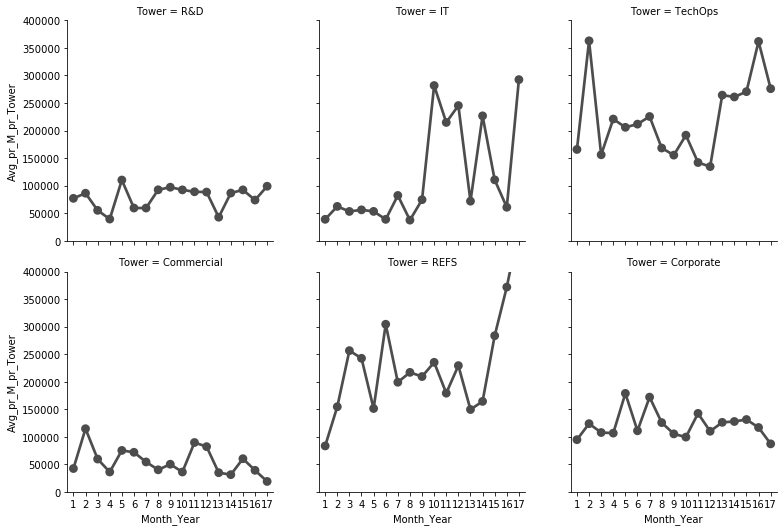

In [470]:
g = sns.FacetGrid(df, col="Tower", col_wrap=3, height=3.75, ylim=(0, 400000))
g = g.map(sns.pointplot, "Month_Year", "Avg_pr_M_pr_Tower", color=".3")
g.set_xticklabels(labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

##### Region
y_axis = average value of spending per month for each catagorie of Tower

x_axis = month (time)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

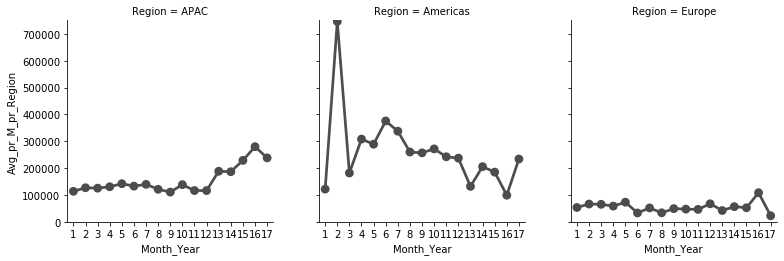

In [387]:
g = sns.FacetGrid(df, col="Region", col_wrap=3, height=3.75, ylim=(0, 750000))
g = g.map(sns.pointplot, "Month_Year", "Avg_pr_M_pr_Region", color=".3")
g.set_xticklabels(labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

##### Catagory

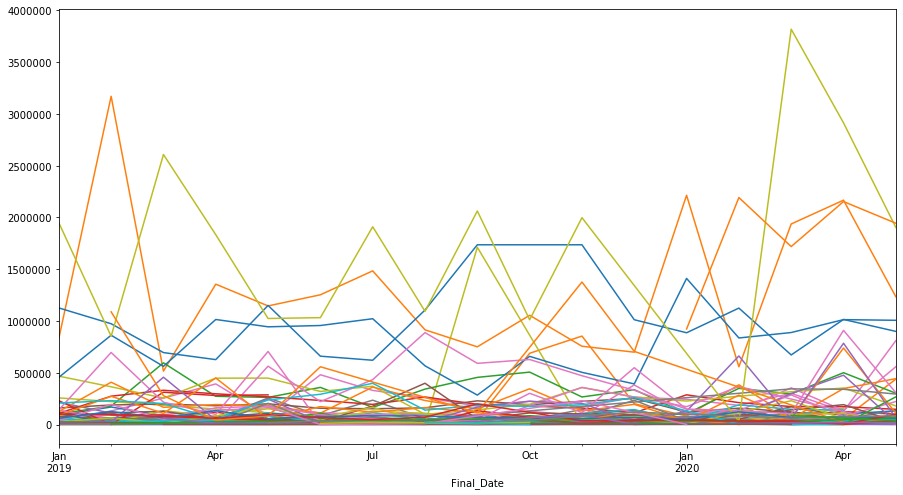

In [462]:
catagories = df.Category.unique()

for catagorie in catagories:
    df1 = df[df['Category'] == catagorie]['Avg_pr_M_pr_Category']
    df_cat0 = df1.groupby('Final_Date').mean()
    df_cat0.plot(figsize=(15,8))

##### Country

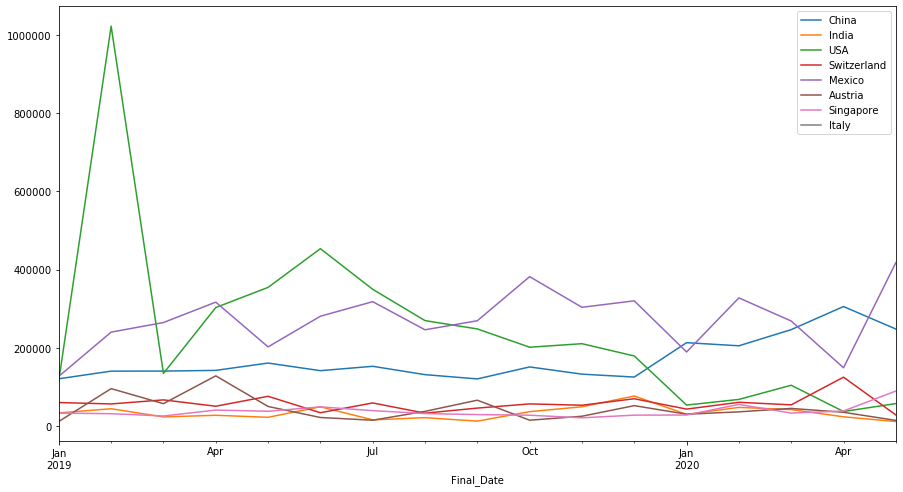

In [460]:
countries = df.Country.unique()

for country in countries:
    df1 = df[df['Country'] == country]['Avg_pr_M_pr_Country']
    df_cat0 = df1.groupby('Final_Date').mean()
    df_cat0.plot(figsize=(15,8)).legend(countries)

##### Conclusion:

From above plots, there are few common insights.
1. No. of data points are only 17 (if we consider average monthly values), which is less for time series
2. Lack of a clear upward/downward trend.
3. Interdependencies of variable which effects spend. These interdepencies will be difficult to capture using timeseries.

#### Studying the variables for Machine Learning Model

##### Missing data

In [473]:
df.isnull().sum()

Supplier Name           0
Region                  0
Country                 0
Tower                   0
Category                0
Spend                   0
Avg_pr_M                0
Avg_pr_M_pr_Tower       0
Avg_pr_M_pr_Category    0
Avg_pr_M_pr_Country     0
Avg_pr_M_pr_Region      0
Avg_pr_M_pr_Vendor      0
Scaled_Tower            0
Scaled_Catagory         0
Scaled_Country          0
Scaled_Region           0
Scaled_Vendor           0
dtype: int64

##### Cardinality

High cardinality leads to uneven distribution of categories in train and test sets

In [474]:
obj_df = df.select_dtypes(include=['object']).copy()

for column in obj_df.columns:
    print('Feature: {} has Cardinality Value: {}'. format(column, len(df[column].unique())))
    #print(df[column].unique())
    print()

Feature: Supplier Name has Cardinality Value: 824

Feature: Region has Cardinality Value: 3

Feature: Country has Cardinality Value: 8

Feature: Tower has Cardinality Value: 6

Feature: Category has Cardinality Value: 64



##### Rare Label



Rare values may cause overfitting in tree based algo

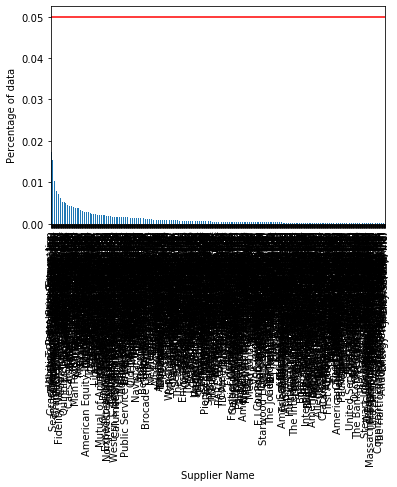

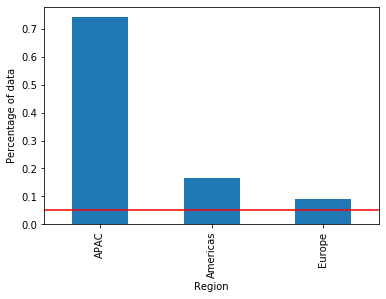

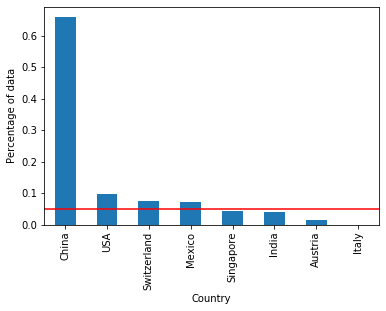

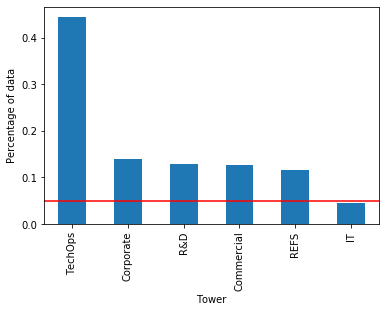

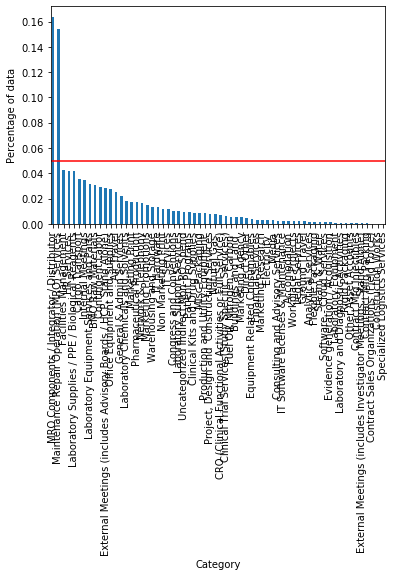

In [475]:
total = len(df)

# for each categorical variable
for col in obj_df:
    temp_df = pd.Series(df[col].value_counts() / total)

    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of data')
    plt.show()

###### Tower

In [482]:
def calculate_mean_target_per_category(df, var):

    total = len(df)

    temp_df = pd.Series(df[var].value_counts() / total).reset_index()
    temp_df.columns = [var, 'perc_data']

    temp_df = temp_df.merge(df.groupby([var])['Spend'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [483]:
temp_df = calculate_mean_target_per_category(df, 'Tower')
temp_df

,Tower,perc_data,Spend
0,TechOps,0.444128,218415.095122
1,Corporate,0.140214,120215.205952
2,R&D,0.128114,79726.473288
3,Commercial,0.126833,58675.202902
4,REFS,0.115160,212603.532015
5,IT,0.045552,116005.586182


In [484]:
def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_data"], color='lightgrey')
    ax2.plot(df.index, df["Spend"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of spending per feature')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average spending per feature')
    plt.show()

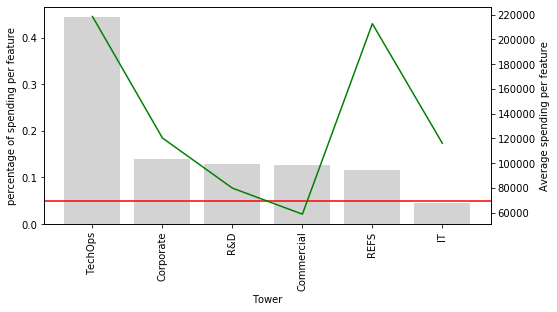

In [485]:
plot_categories(temp_df, 'Tower')

###### Catagory

This analysis is important because the catagories which are rare has higher spending, that means that they are important but we don't have enough data so that model will learn it properly.

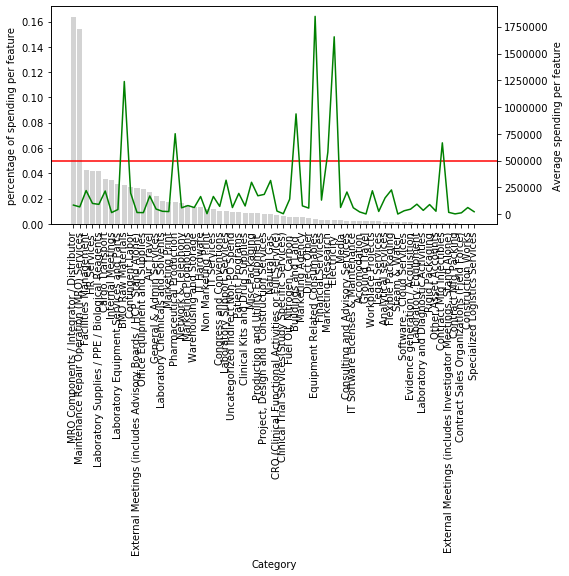

In [486]:
temp_df = calculate_mean_target_per_category(df, 'Category')
plot_categories(temp_df, 'Category')

###### Country

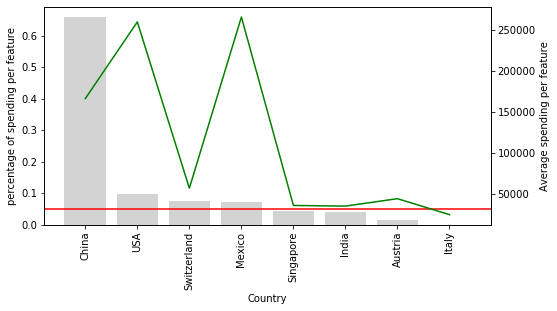

In [487]:
temp_df = calculate_mean_target_per_category(df, 'Country')
plot_categories(temp_df, 'Country')

###### Supplier Name

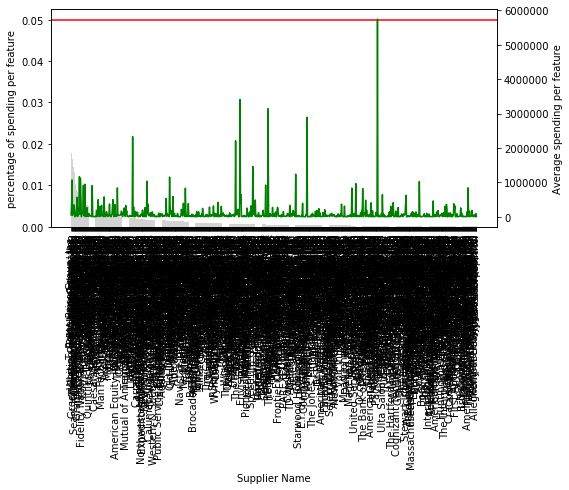

In [488]:
temp_df = calculate_mean_target_per_category(df, 'Supplier Name')
plot_categories(temp_df, 'Supplier Name')

##### Linear Relationship



In this section we are study the linear relationship of target with other features which were created. Our conclusion from this is even after variable log transformation, linear relationship is not good. 

###### linear plot

<IPython.core.display.Javascript object>

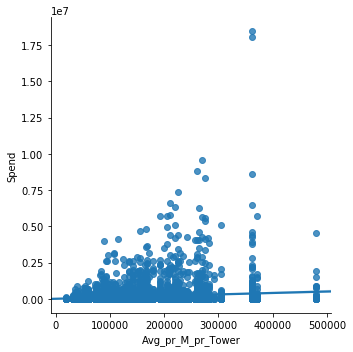

In [490]:
sns.lmplot(x="Avg_pr_M_pr_Tower", y="Spend", data=df, order=1)

<IPython.core.display.Javascript object>

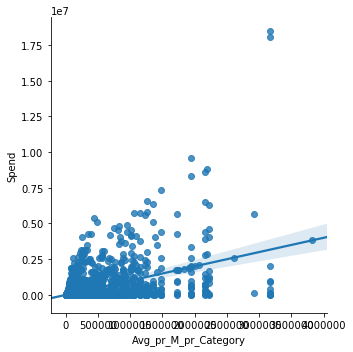

In [491]:
sns.lmplot(x="Avg_pr_M_pr_Category", y="Spend", data=df, order=1)

<IPython.core.display.Javascript object>

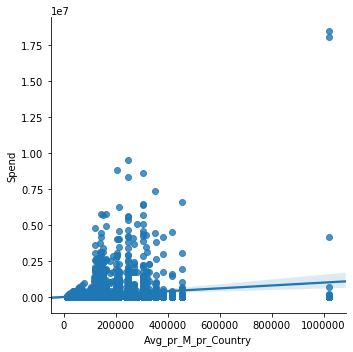

In [492]:
sns.lmplot(x="Avg_pr_M_pr_Country", y="Spend", data=df, order=1)

<IPython.core.display.Javascript object>

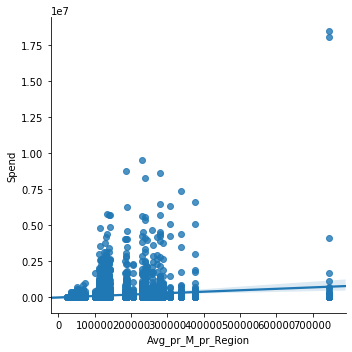

In [493]:
sns.lmplot(x="Avg_pr_M_pr_Region", y="Spend", data=df, order=1)

<IPython.core.display.Javascript object>

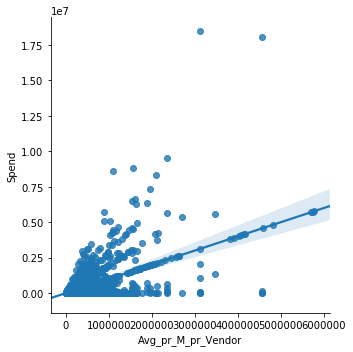

In [494]:
sns.lmplot(x="Avg_pr_M_pr_Vendor", y="Spend", data=df, order=1)

###### Linear plot after log transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

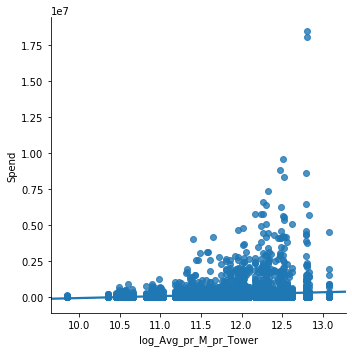

In [501]:
df['log_Avg_pr_M_pr_Tower'] = np.log(df['Avg_pr_M_pr_Tower'])
sns.lmplot(x="log_Avg_pr_M_pr_Tower", y="Spend", data=df, order=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

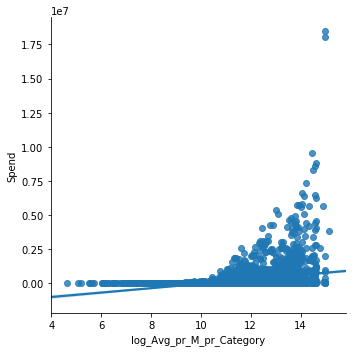

In [502]:
df['log_Avg_pr_M_pr_Category'] = np.log(df['Avg_pr_M_pr_Category'])
sns.lmplot(x="log_Avg_pr_M_pr_Category", y="Spend", data=df, order=1)

###### Correlation Plot

<IPython.core.display.Javascript object>

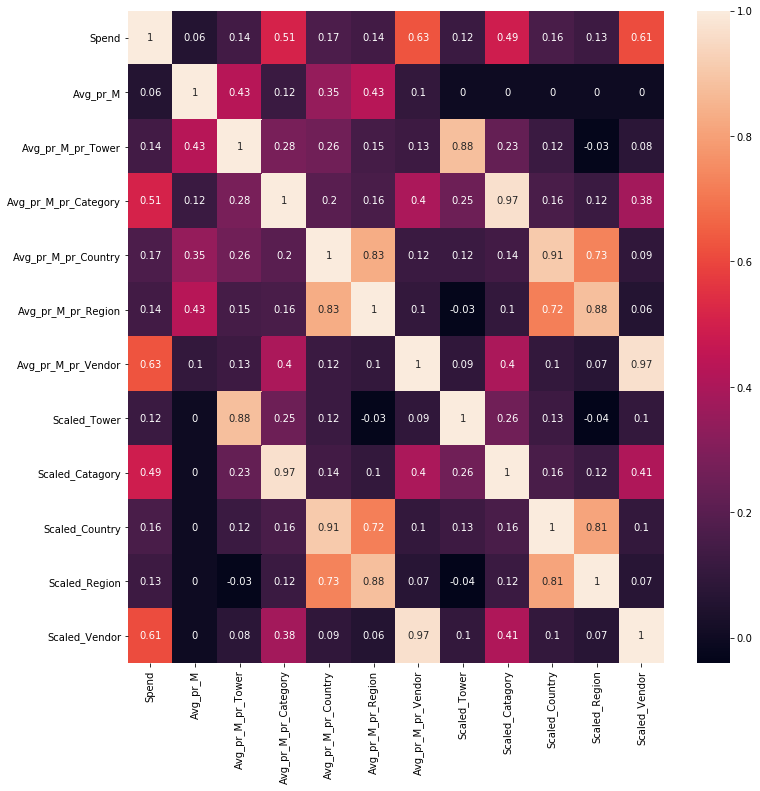

In [495]:
Cont_df = df.select_dtypes(include=['int64', 'float']).copy()

correlation_matrix = Cont_df.corr().round(2)

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

<IPython.core.display.Javascript object>

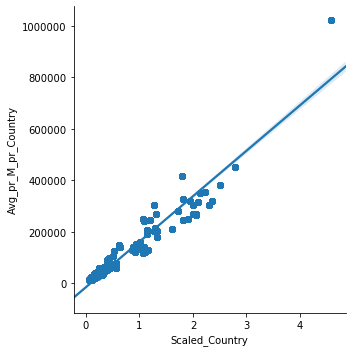

In [500]:
sns.lmplot(x="Scaled_Country", y="Avg_pr_M_pr_Country", data=df, order=1)

<IPython.core.display.Javascript object>

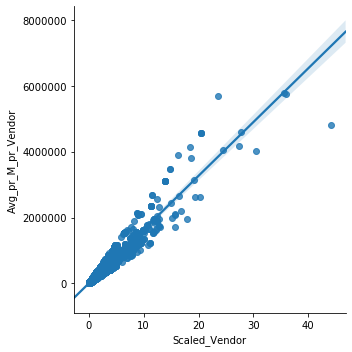

In [499]:
sns.lmplot(x="Scaled_Vendor", y="Avg_pr_M_pr_Vendor", data=df, order=1)

<IPython.core.display.Javascript object>

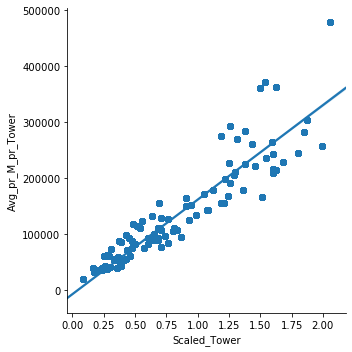

In [497]:
sns.lmplot(x="Scaled_Tower", y="Avg_pr_M_pr_Tower", data=df, order=1)

<IPython.core.display.Javascript object>

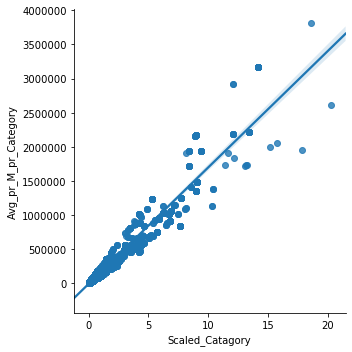

In [498]:
sns.lmplot(x="Scaled_Catagory", y="Avg_pr_M_pr_Category", data=df, order=1)

So our beleif of creating new scaled feature which could be used as additional feature to capture some amount of information can not be used as they have high correlation with their average values. We need to remove them.

##### Outlier

We study the presense of outlier using interquantile proximity rule

###### Plotting Histogram, QQ Plot and Box plot

In [504]:
df.columns

Index(['Supplier Name', 'Region', 'Country', 'Tower', 'Category', 'Spend',
       'Avg_pr_M', 'Avg_pr_M_pr_Tower', 'Avg_pr_M_pr_Category',
       'Avg_pr_M_pr_Country', 'Avg_pr_M_pr_Region', 'Avg_pr_M_pr_Vendor',
       'Scaled_Tower', 'Scaled_Catagory', 'Scaled_Country', 'Scaled_Region',
       'Scaled_Vendor', 'log_Avg_pr_M_pr_Tower', 'log_Avg_pr_M_pr_Category'],
      dtype='object')

In [506]:
import scipy.stats as stats

def diagnostic_plots(df, variable):

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

The feature is Avg_pr_M:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

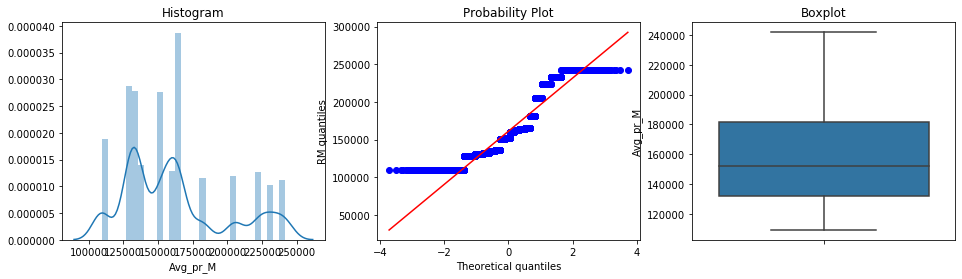

The feature is Avg_pr_M_pr_Tower:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

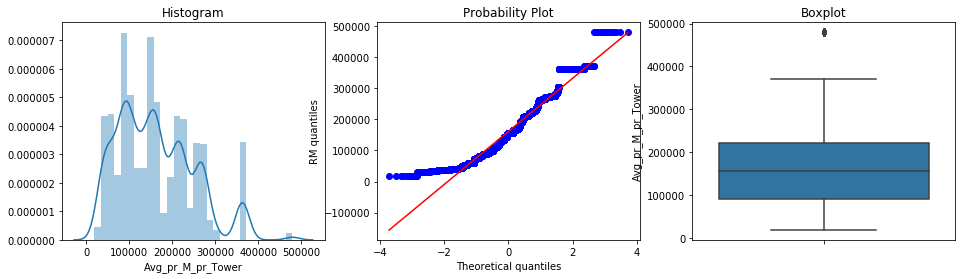

The feature is Avg_pr_M_pr_Category:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

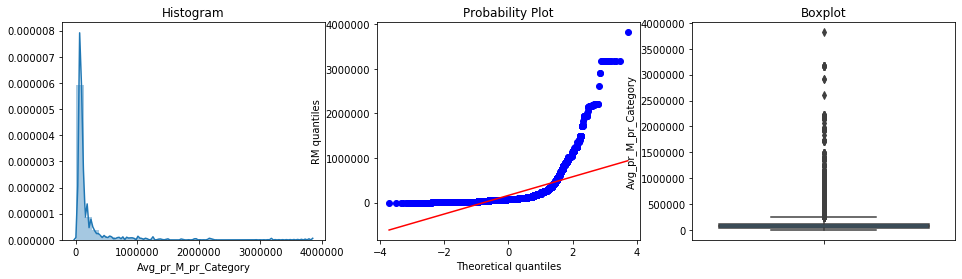

The feature is Avg_pr_M_pr_Country:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

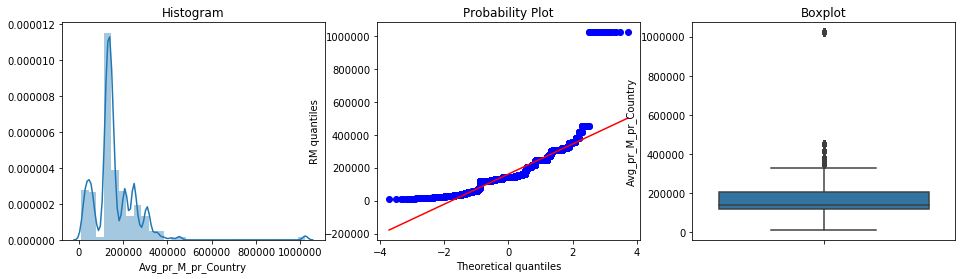

The feature is Avg_pr_M_pr_Region:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

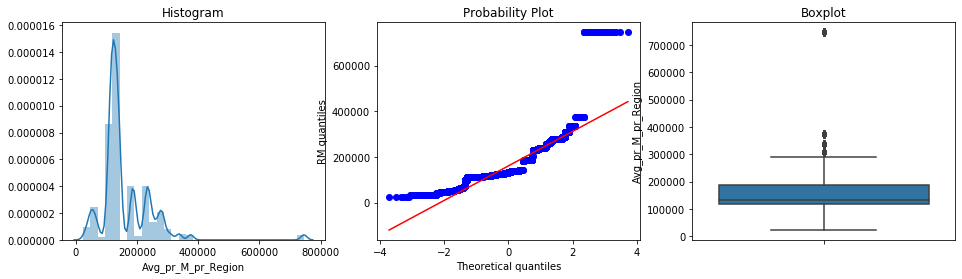

The feature is Avg_pr_M_pr_Vendor:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

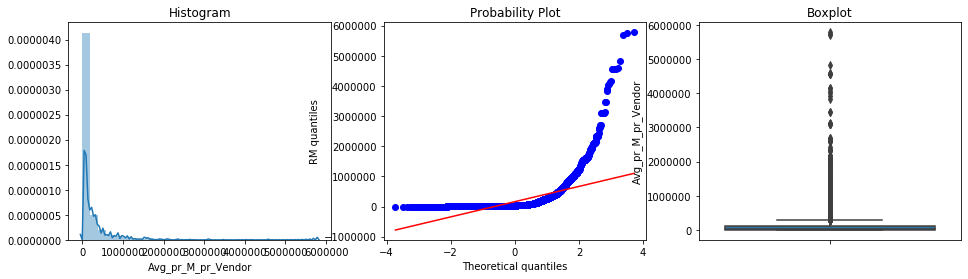

The feature is Spend:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

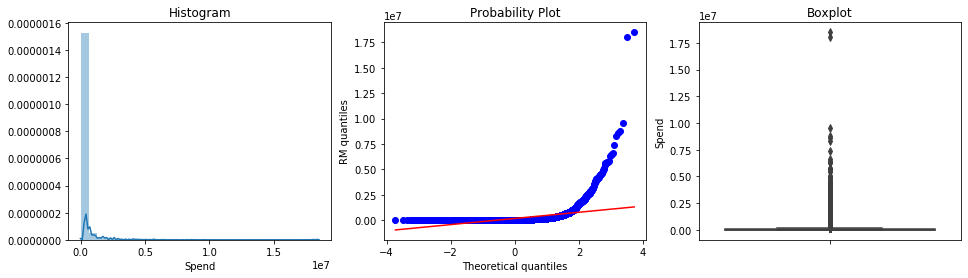

In [510]:
for column in ['Avg_pr_M', 'Avg_pr_M_pr_Tower', 'Avg_pr_M_pr_Category','Avg_pr_M_pr_Country', 
                'Avg_pr_M_pr_Region', 'Avg_pr_M_pr_Vendor', 'Spend']:
    print('The feature is {}:'.format(column))
    diagnostic_plots(df, column)

###### Outlier detection for skewed variables

In [511]:
# function to find upper and lower boundaries
# for skewed distributed variables

def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [530]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

print('total data: {}'.format(len(df)))
print()
for feature in ['Avg_pr_M_pr_Category','Avg_pr_M_pr_Vendor','Spend', 'Avg_pr_M_pr_Region','Avg_pr_M_pr_Tower']:
    upper_boundary, lower_boundary = find_skewed_boundaries(df, feature, 1.5)
    print('{}: upper limit & {}: lower limit'.format(upper_boundary, lower_boundary) )
    
    print('data with value bigger than {}: {}'.format(upper_boundary, len(df[df[feature] > upper_boundary])))
    print('% data with value bigger than {}: {}'.format(upper_boundary, len(df[df[feature] > upper_boundary])/len(df)))
    print()                                                                      

total data: 7025

246017.3723207988: upper limit & -76290.58196415287: lower limit
data with value bigger than 246017.3723207988: 943
% data with value bigger than 246017.3723207988: 0.13423487544483986

300707.51928516: upper limit & -168127.20233244: lower limit
data with value bigger than 300707.51928516: 1007
% data with value bigger than 300707.51928516: 0.14334519572953736

179111.98187532002: upper limit & -100340.69640660001: lower limit
data with value bigger than 179111.98187532002: 1042
% data with value bigger than 179111.98187532002: 0.14832740213523132

296109.1579575251: upper limit & 8924.874981761226: lower limit
data with value bigger than 296109.1579575251: 273
% data with value bigger than 296109.1579575251: 0.038861209964412814

413732.07774968795: upper limit & -100695.63139588707: lower limit
data with value bigger than 413732.07774968795: 26
% data with value bigger than 413732.07774968795: 0.003701067615658363



##### Feature Scaling

We are planning to go ahead with tree based algorithm, hence feature scalling is not important.

### Preparing Data For ML Models

In [467]:
df.drop(['Year', 'Month', 'Month_Year'], inplace=True,axis=1)

In [533]:
df.head(2)

,Supplier Name,Region,Country,Tower,Category,Spend,Avg_pr_M,Avg_pr_M_pr_Tower,Avg_pr_M_pr_Category,Avg_pr_M_pr_Country,Avg_pr_M_pr_Region,Avg_pr_M_pr_Vendor,Scaled_Tower,Scaled_Catagory,Scaled_Country,Scaled_Region,Scaled_Vendor
Final_Date,,,,,,,,,,,,,,,,,
2019-01,"AptarGroup, Inc.",APAC,China,R&D,Laboratory Equipment Services and Parts,964537.590650,109290.666602,76869.416233,119281.653576,121275.831388,113822.506881,964537.59065,0.703348,1.091417,1.109663,1.041466,8.825434
2019-01,UnitedHealth Group,APAC,India,IT,IT Hardware,1609.153631,109290.666602,38833.989011,1886.232363,34003.078873,113822.506881,1409.83589,0.355328,0.017259,0.311125,1.041466,0.012900


### Feature Engineering

#### Variable Transformation

In [535]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [546]:
# Transforming Variable

lt1 = vt.BoxCoxTransformer(variables = ['Avg_pr_M','Avg_pr_M_pr_Tower','Avg_pr_M_pr_Category','Avg_pr_M_pr_Country','Avg_pr_M_pr_Region','Avg_pr_M_pr_Vendor'])
lt1.fit(df)
data_tf1 = lt1.transform(df)

lt2 = vt.YeoJohnsonTransformer(variables = ['Avg_pr_M','Avg_pr_M_pr_Tower','Avg_pr_M_pr_Category','Avg_pr_M_pr_Country','Avg_pr_M_pr_Region','Avg_pr_M_pr_Vendor'])
lt2.fit(df)
data_tf2 = lt2.transform(df)

C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\scipy\stats\morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\scipy\optimize\optimize.py:1986: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\scipy\optimize\optimize.py:1987: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\scipy\optimize\optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\saurabhkumar9\AppData\Local\Continuum\anaconda2\envs\spyder\lib\site-packages\scipy\optimize\optimize.py:1984: RuntimeWarning: inval

Plot for Avg_pr_M


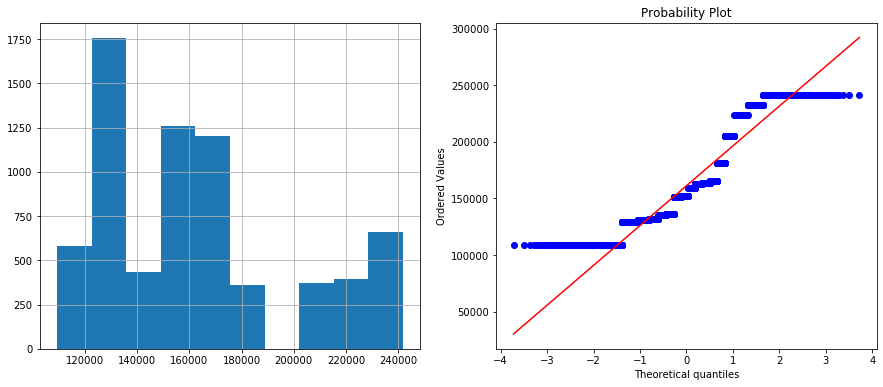

BoxCox Transformed Plot for Avg_pr_M


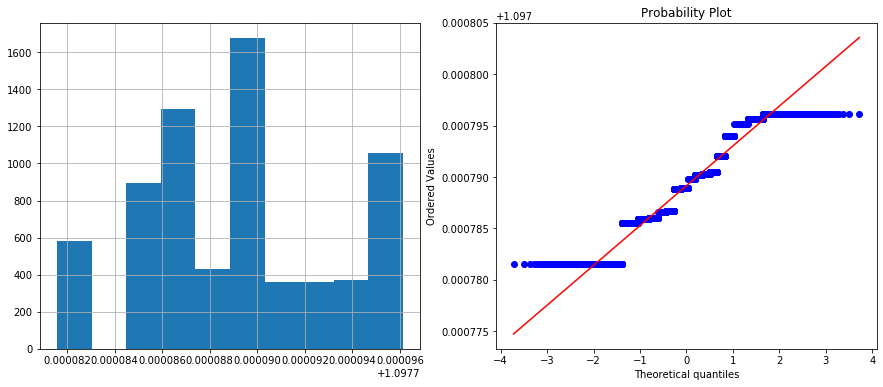

Yeo Johnson Transformed Plot for Avg_pr_M


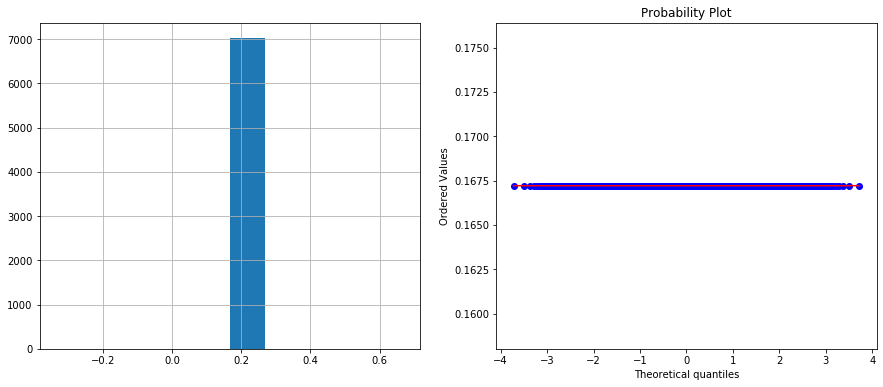

Plot for Avg_pr_M_pr_Tower


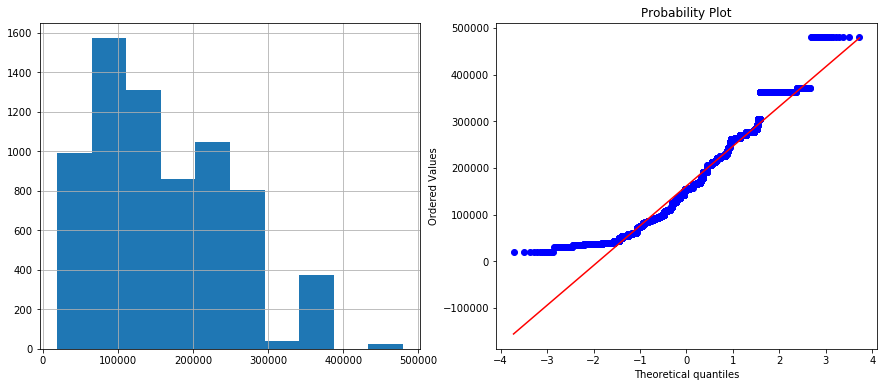

BoxCox Transformed Plot for Avg_pr_M_pr_Tower


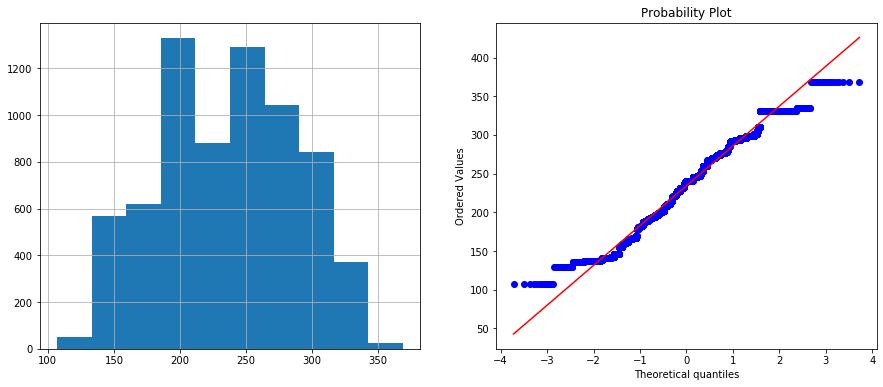

Yeo Johnson Transformed Plot for Avg_pr_M_pr_Tower


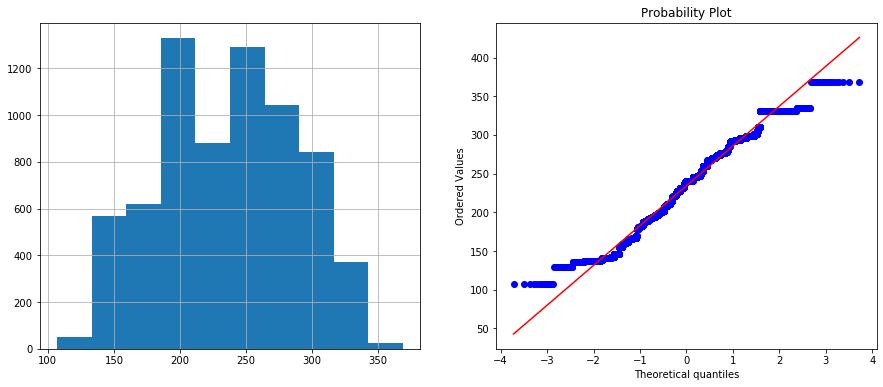

Plot for Avg_pr_M_pr_Category


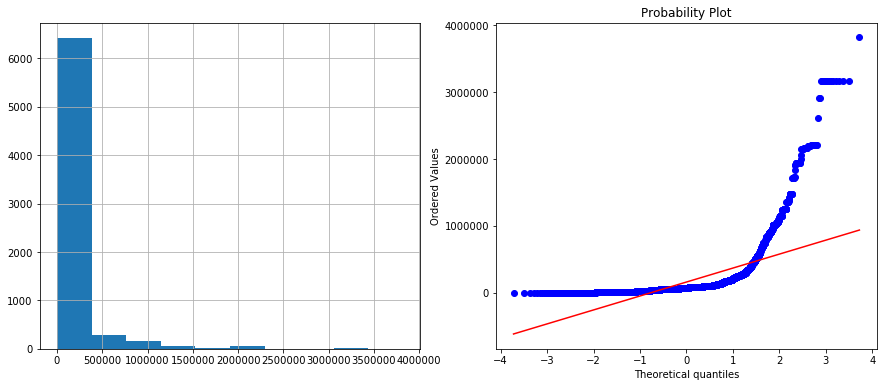

BoxCox Transformed Plot for Avg_pr_M_pr_Category


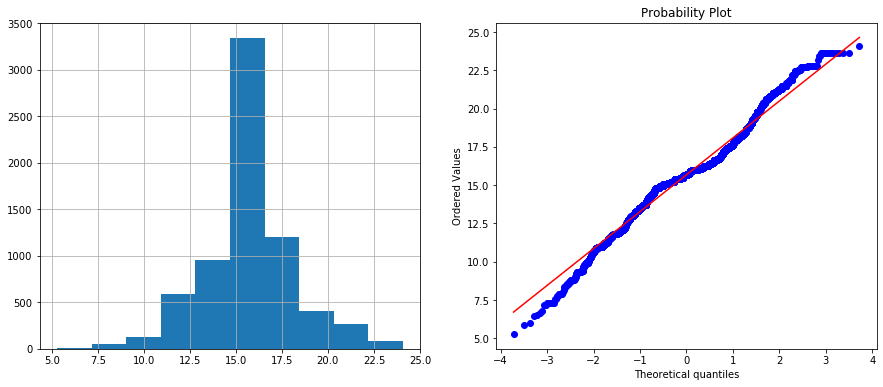

Yeo Johnson Transformed Plot for Avg_pr_M_pr_Category


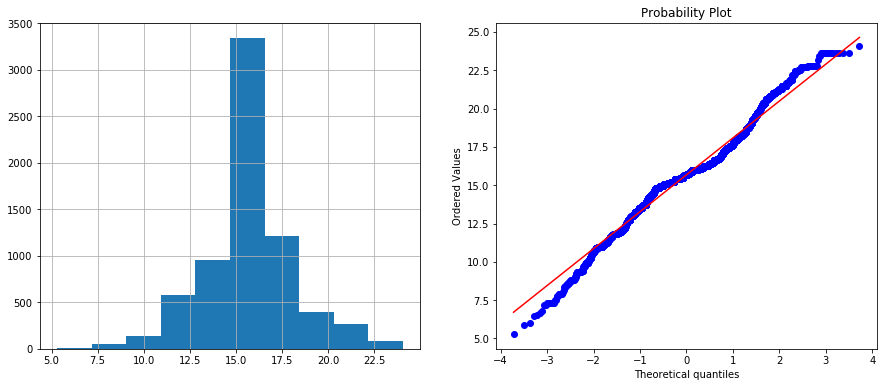

Plot for Avg_pr_M_pr_Country


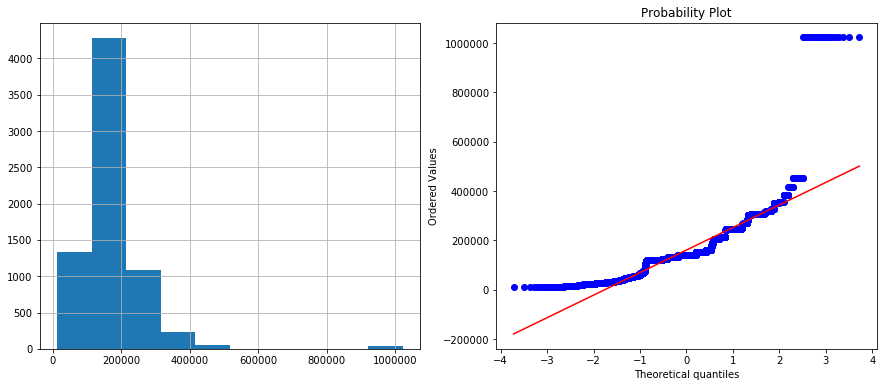

BoxCox Transformed Plot for Avg_pr_M_pr_Country


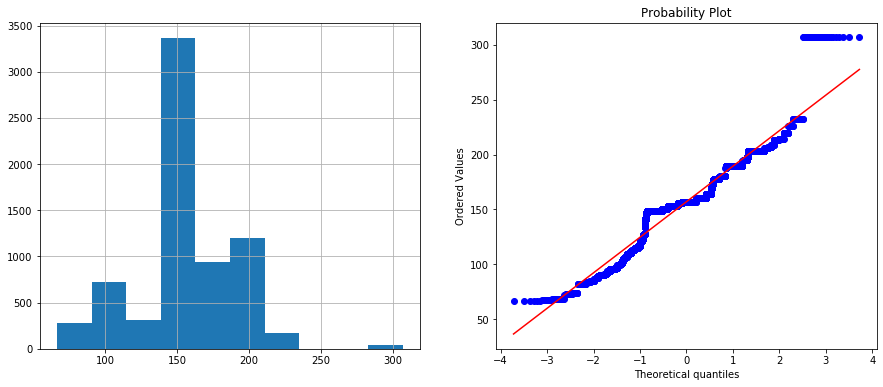

Yeo Johnson Transformed Plot for Avg_pr_M_pr_Country


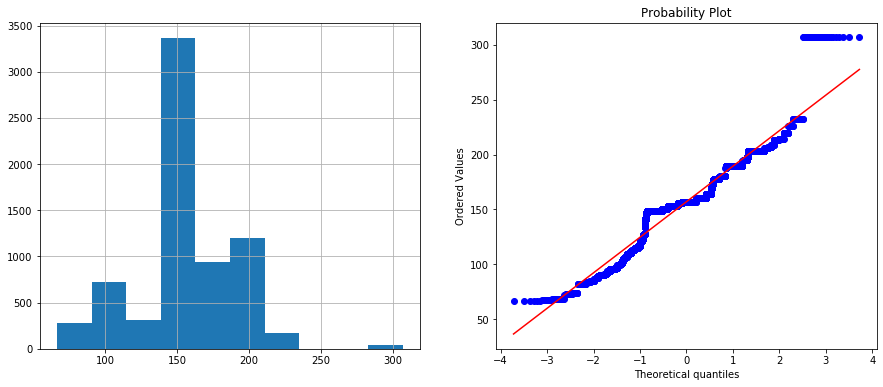

Plot for Avg_pr_M_pr_Region


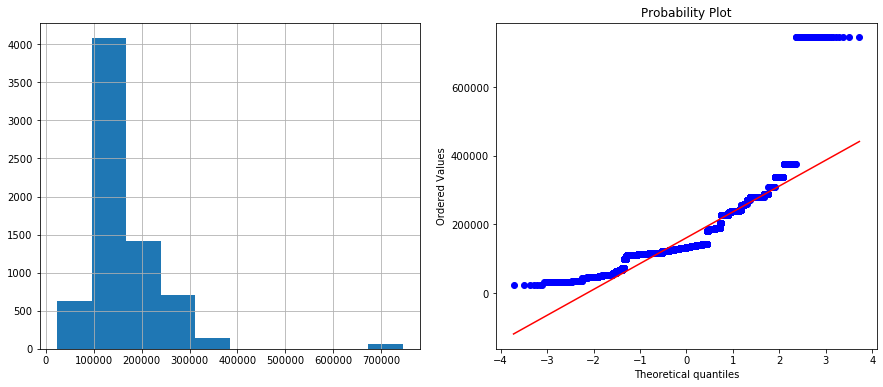

BoxCox Transformed Plot for Avg_pr_M_pr_Region


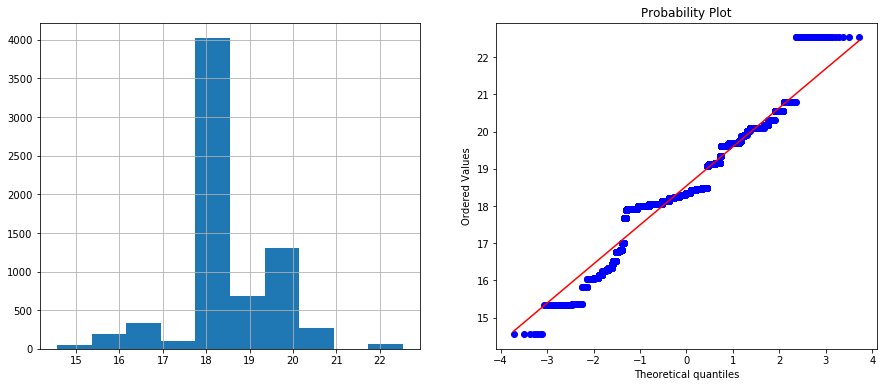

Yeo Johnson Transformed Plot for Avg_pr_M_pr_Region


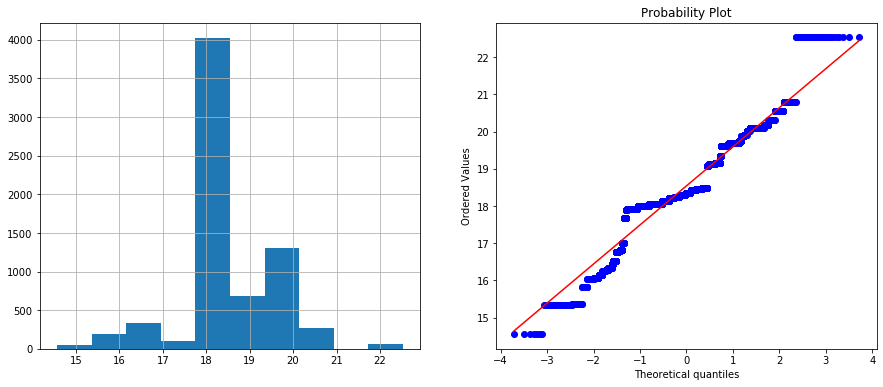

Plot for Avg_pr_M_pr_Vendor


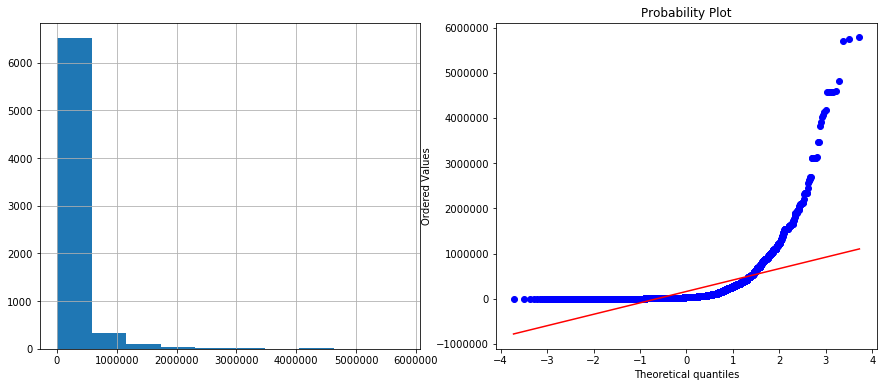

BoxCox Transformed Plot for Avg_pr_M_pr_Vendor


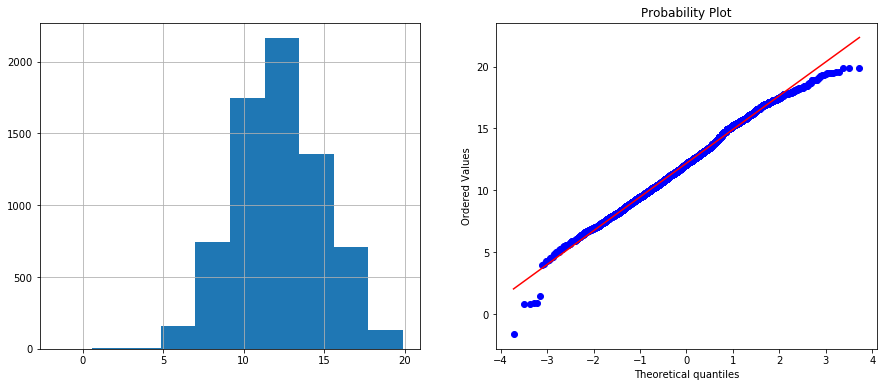

Yeo Johnson Transformed Plot for Avg_pr_M_pr_Vendor


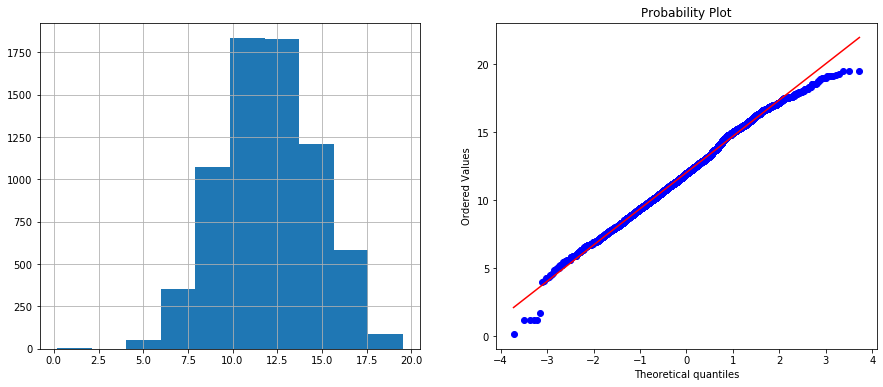

In [548]:
# plotting
for variable in ['Avg_pr_M', 'Avg_pr_M_pr_Tower', 'Avg_pr_M_pr_Category','Avg_pr_M_pr_Country', 
                 'Avg_pr_M_pr_Region', 'Avg_pr_M_pr_Vendor']:
    print('Plot for {}'.format(variable))
    diagnostic_plots(df, variable)
    print('BoxCox Transformed Plot for {}'.format(variable))
    diagnostic_plots(data_tf1, variable)
    print('Yeo Johnson Transformed Plot for {}'.format(variable))
    diagnostic_plots(data_tf2, variable)

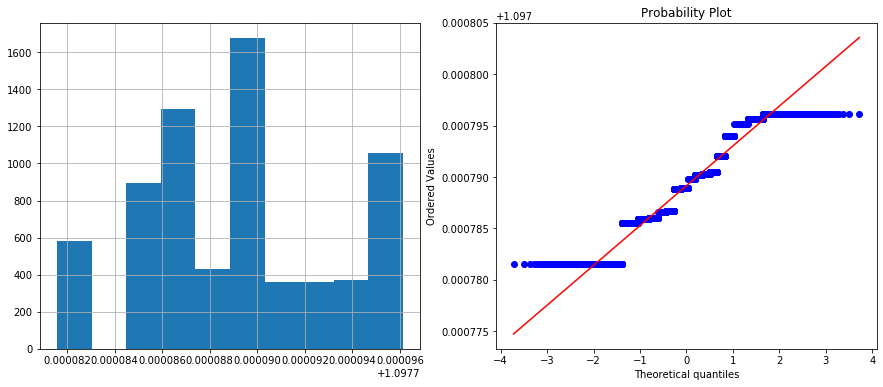

In [543]:
diagnostic_plots(data_tf, 'Avg_pr_M')